1. Water jug problem


In [1]:
from collections import deque
def BFS(a, b, target):
    m = {}
    isSolvable = False
    path = []
    q = deque()
    q.append((0, 0))

    while (len(q) > 0):
        u = q.popleft()
        if ((u[0], u[1]) in m):
            continue
        if ((u[0] > a or u[1] > b or
            u[0] < 0 or u[1] < 0)):
            continue
        path.append([u[0], u[1]])
        m[(u[0], u[1])] = 1
        if (u[0] == target or u[1] == target):
            isSolvable = True
            if (u[0] == target):
                if (u[1] != 0):
                    path.append([u[0], 0])
            else:
                if (u[0] != 0):
                    path.append([0, u[1]])
            sz = len(path)
            for i in range(sz):
                print("(", path[i][0], ",",
                    path[i][1], ")")
            break
        q.append([u[0], b])
        q.append([a, u[1]])
        for ap in range(max(a, b) + 1):
            c = u[0] + ap
            d = u[1] - ap
            if (c == a or (d == 0 and d >= 0)):
                q.append([c, d])
            c = u[0] - ap
            d = u[1] + ap
            if ((c == 0 and c >= 0) or d == b):
                q.append([c, d])
        q.append([a, 0])
        q.append([0, b])
    if (not isSolvable):
        print("No solution")

if __name__ == '__main__':
    Jug1, Jug2, target = 4, 3, 2
    print("Path from initial state to solution state :")
    BFS(Jug2, Jug1, target)


Path from initial state to solution state :
( 0 , 0 )
( 0 , 4 )
( 3 , 0 )
( 3 , 4 )
( 3 , 1 )
( 0 , 3 )
( 3 , 3 )
( 2 , 4 )
( 2 , 0 )


2. FIND-S algorithm

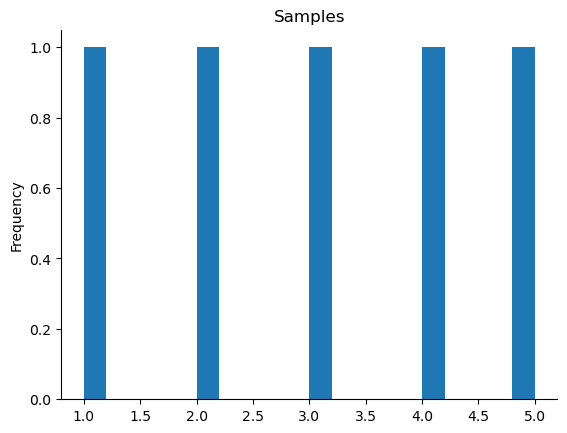

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
data=pd.DataFrame({"Samples":[1,2,3,4,5],
                   "Fever":["Yes","No","Yes","No","Yes"],
                   "Cough":["Yes","Yes","Yes","No","Yes"],
                   "Difficulty Breathing":["No","No","Yes","No","Yes"],
                   "Diagnosed Disease":["Pneumonia","Common Cold","Pneumonia","Healthy",
                                        "Pneumonia"]})
from matplotlib import pyplot as plt
data['Samples'].plot(kind='hist', bins=20, title='Samples')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
target="Pneumonia"
symptoms=["Fever","Cough","Difficulty Breathing"]
filter=data[data["Diagnosed Disease"]==target]
print(filter)

   Samples Fever Cough Difficulty Breathing Diagnosed Disease
0        1   Yes   Yes                   No         Pneumonia
2        3   Yes   Yes                  Yes         Pneumonia
4        5   Yes   Yes                  Yes         Pneumonia


In [4]:
total=filter.shape[0]
print(total)

3


In [5]:
pos = filter[(filter["Fever"] == "Yes") & (filter["Cough"] == "Yes") & (filter["Difficulty Breathing"] == "Yes")].shape[0]
print(pos)

2


In [6]:
print(f"Rule: If a patient has {', '.join(symptoms)}, then they are likely to have {target}")

Rule: If a patient has Fever, Cough, Difficulty Breathing, then they are likely to have Pneumonia


In [7]:
support = pos/total
print(f"Support : {support:.2f}")
confidence=pos/data[(data["Fever"] == "Yes") & (data["Cough"] == "Yes") & (data["Difficulty Breathing"] == "Yes")].shape[0]
print(f"Confidence : {confidence:.2f}")

Support : 0.67
Confidence : 1.00


3. Candidate Elimination

Method 1

In [8]:
import numpy as np

class CandidateElimination:
    def __init__(self, num_features):
        # Initialize the most specific and most general hypotheses
        self.S = ['0'] * num_features
        self.G = ['?'] * num_features

    def specialize_G(self, example):
        # Specialize the most general hypothesis based on a positive example
        for i in range(len(self.G)):
            if self.G[i] == '?':
                self.G[i] = example[i]
            elif self.G[i] != example[i]:
                self.G[i] = '?'

    def generalize_S(self, example):
        # Generalize the most specific hypothesis based on a negative example
        for i in range(len(self.S)):
            if self.S[i] != example[i] and self.S[i] != '0':
                self.S[i] = '?'

    def fit(self, examples):
        for example in examples:
            label = example[-1]  # Last element is the label
            if label == 'Yes':
                self.specialize_G(example[:-1])  # Update G for positive example
            else:
                self.generalize_S(example[:-1])  # Update S for negative example

    def get_final_hypothesis(self):
        return self.S, self.G

# Example dataset
examples = [
    ['Big', 'Red', 'Circle', 'No'],
    ['Small', 'Red', 'Triangle', 'No'],
    ['Small', 'Red', 'Circle', 'Yes'],
    ['Big', 'Blue', 'Circle', 'No']
]

# Initialize CandidateElimination object
ce = CandidateElimination(num_features=len(examples[0]) - 1)  # -1 for excluding label

# Fit the data
ce.fit(examples)

# Get the final hypothesis
final_specific_hypothesis, final_general_hypothesis = ce.get_final_hypothesis()

print("Final Specific Hypothesis:", final_specific_hypothesis)
print("Final General Hypothesis:", final_general_hypothesis)


Final Specific Hypothesis: ['0', '0', '0']
Final General Hypothesis: ['Small', 'Red', 'Circle']


Method 2

In [9]:
data = [
    ('Big', 'Red', 'Circle', 'No'),
    ('Small', 'Red', 'Triangle', 'No'),
    ('Small', 'Red', 'Circle', 'Yes'),
    ('Big', 'Blue', 'Circle', 'No'),
    ('Small', 'Blue', 'Circle','Yes')
]
def get_domains(data):
    d = [set() for i in data[0]]
    for x in data:
        for i, xi in enumerate(x):
            d[i].add(xi)
    return [list(sorted(x)) for x in d]
get_domains(data)
def g_0(n):
    return ('?',)*n

def s_0(n):
    return ('Phi',)*n
def more_general(h1, h2):
    more_general_parts = []
    for x, y in zip(h1, h2):
        mg = x == '?' or (x != 'Phi' and (x == y or y == 'Phi'))
        more_general_parts.append(mg)
    return all(more_general_parts)

def consistent(hypothesis,example):
    return more_general(hypothesis, example)

def min_generalizations(h, x):
    h_new = list(h)
    for i in range(len(h)):
        if not consistent(h[i:i+1],x[i:i+1]):
            if h[i] != 'Phi':
                h_new[i] = '?'
            else:
                h_new[i] = x[i]
    return [tuple(h_new)]

def generalize_S(x, G, S):
    S_prev = list(S)
    for s in S_prev:
        if s not in S:
            continue
        if not consistent(s,x):
            S.remove(s)
            Splus = min_generalizations(s, x)
            S.update([h for h in Splus if any([more_general(g,h)
                                               for g in G])])

            S.difference_update([h for h in S if
                                 any([more_general(h, h1)
                                      for h1 in S if h != h1])])
    return S

def min_specializations(h, domains, x):
    results = []
    for i in range(len(h)):
        if h[i] == '?':
            for val in domains[i]:
                if x[i] != val:
                    h_new = h[:i] + (val,) + h[i+1:]
                    results.append(h_new)
        elif h[i] != 'Phi':
            h_new = h[:i] + ('Phi',) + h[i+1:]
            results.append(h_new)
    return results

def specialize_G(x, domains, G, S):
    G_prev = list(G)
    for g in G_prev:
        if g not in G:
            continue
        if consistent(g,x):
            G.remove(g)
            Gminus = min_specializations(g, domains, x)
            G.update([h for h in Gminus if any([more_general(h, s)
                                                for s in S])])
            G.difference_update([h for h in G if
                                 any([more_general(g1, h)
                                      for g1 in G if h != g1])])
    return G

def candidate_elimination(examples):
    domains = get_domains(examples)[:-1]

    G = set([g_0(len(domains))])
    S = set([s_0(len(domains))])
    i=0
    print('All the hypotheses in General and Specific boundary are:\n')
    print('\n G[{0}]:'.format(i),G)
    print('\n S[{0}]:'.format(i),S)
    for xcx in examples:
        i=i+1
        x, cx = xcx[:-1], xcx[-1]
        if cx=='Yes':
            G = {g for g in G if consistent(g,x)}
            S = generalize_S(x, G, S)
        else:
            S = {s for s in S if not consistent(s,x)}
            G = specialize_G(x, domains, G, S)
        print('\n G[{0}]:'.format(i),G)
        print('\n S[{0}]:'.format(i),S)
    return
candidate_elimination(data)


All the hypotheses in General and Specific boundary are:


 G[0]: {('?', '?', '?')}

 S[0]: {('Phi', 'Phi', 'Phi')}

 G[1]: {('Small', '?', '?'), ('?', 'Blue', '?'), ('?', '?', 'Triangle')}

 S[1]: {('Phi', 'Phi', 'Phi')}

 G[2]: {('Big', '?', 'Triangle'), ('Small', '?', 'Circle'), ('?', 'Blue', '?')}

 S[2]: {('Phi', 'Phi', 'Phi')}

 G[3]: {('Small', '?', 'Circle')}

 S[3]: {('Small', 'Red', 'Circle')}

 G[4]: {('Small', '?', 'Circle')}

 S[4]: {('Small', 'Red', 'Circle')}

 G[5]: {('Small', '?', 'Circle')}

 S[5]: {('Small', '?', 'Circle')}


In [1]:
import pandas as pd

# Creating a more varied dataset
data = pd.DataFrame({
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No']
})

# Step 1: Initialize h to the most specific hypothesis in H
hypothesis = pd.Series(['ϕ'] * (len(data.columns) - 1), index=data.columns[:-1])

# Display the initial hypothesis
print("Step 1: Initial Hypothesis")
print(hypothesis, "\n")

# Step 2: Iterate through positive examples
for index, row in data.iterrows():
    if row['PlayTennis'] == 'Yes':
        for attribute in data.columns[:-1]:
            # If the constraint ai is satisfied by x, do nothing
            if hypothesis[attribute] == 'ϕ' or hypothesis[attribute] == row[attribute]:
                pass
            # Replace ai in h with the next more general constraint that is satisfied by x
            else:
                hypothesis[attribute] = '?'

# Display the final hypothesis
print("Step 3: Final Hypothesis")
print(hypothesis)


Step 1: Initial Hypothesis
Weather        ϕ
Temperature    ϕ
Wind           ϕ
dtype: object 

Step 3: Final Hypothesis
Weather        ϕ
Temperature    ϕ
Wind           ϕ
dtype: object
